# Lab 8, 9 Association mining
## Cel Badania

Dane do analizy sa transakcje pochodzące z pewnego sklepu spożywczego. Celem
badania jest szukanie

  1. produktów popularnych (często kupowanych).
  2. produktów rzadkich (rzadko kupowanych).
  3. produktów, które sa czesto kupowane razem.
  4. asocjacji między produktami.
  5. analiza czasu działania algorytmu *Apriori* i *FPGrowth*.

## Zad1
### Zainstalować mlxtend

In [1]:
!pip install mlxtend

## Zad2
### Wprowadzić dane z zadania 5 na ćwiczeniach 8 (Eksploaracja reguł asocjacyjnych).



In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

### Przekształacić dane na binarne (_Transaction_Encoder_)

In [3]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [4]:
df = pd.DataFrame(te_ary, columns=te.columns_)
display(df)
df.shape

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


(5, 11)

### Ustawić parametry min_sup i generować wszystkie produkty częste i dwójki częste.


In [5]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.2,(Apple)
1,0.4,(Corn)
2,0.2,(Dill)
3,0.8,(Eggs)
4,0.2,(Ice cream)
...,...,...
144,0.4,"(Yogurt, Onion, Eggs, Kidney Beans, Nutmeg)"
145,0.2,"(Yogurt, Onion, Milk, Eggs, Nutmeg)"
146,0.2,"(Yogurt, Onion, Milk, Kidney Beans, Nutmeg)"
147,0.2,"(Yogurt, Onion, Eggs, Dill, Kidney Beans, Nutmeg)"


### Uporządkować produkty w kolejności malejącej względem wsparcia.

In [6]:
frequent_itemsets = frequent_itemsets.sort_values(['support'], ascending =[False])
frequent_itemsets.head(5)

,support,itemsets
5,1.0,(Kidney Beans)
3,0.8,(Eggs)
27,0.8,"(Kidney Beans, Eggs)"
30,0.6,"(Onion, Eggs)"
8,0.6,(Onion)


### Pokazać 5 najczęstrzych produktów na wykresie słupkowym (nazwa i wsparcie)

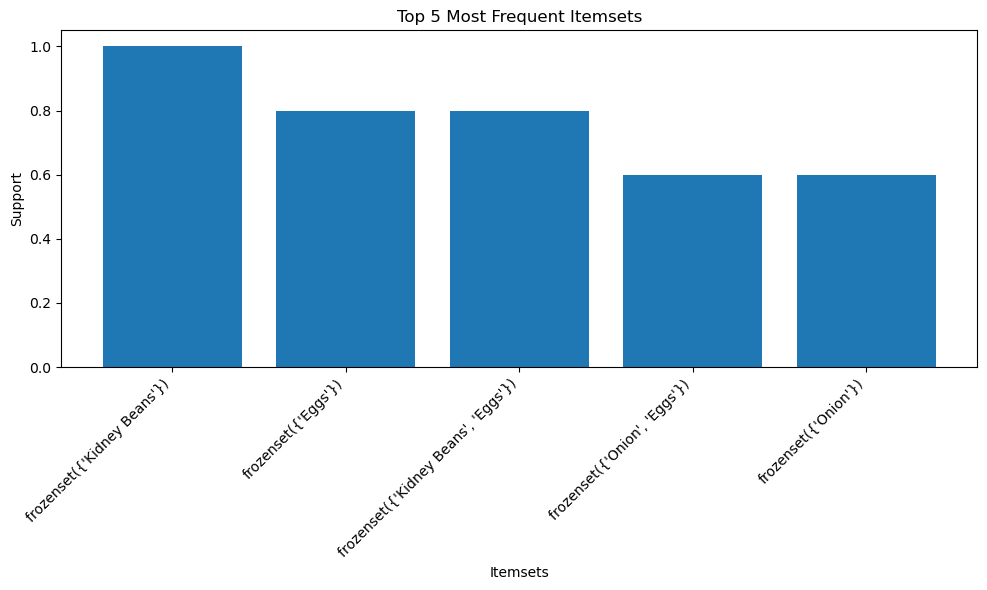

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(frequent_itemsets.head(5)['itemsets'].astype(str), frequent_itemsets.head(5)['support'])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Top 5 Most Frequent Itemsets')
plt.tight_layout()
plt.show()

## Zad3
### Wyznaczyć zbiory częste dwu-, trzy-elementowe. Uporządkować malejąco względem wsparcia.

In [8]:
frequent_itemsets_2 = apriori(df, min_support=0.1, use_colnames=True, max_len=2)
frequent_itemsets_3 = apriori(df, min_support=0.1, use_colnames=True, max_len=3)

frequent_itemsets_2 = frequent_itemsets_2.sort_values(['support'], ascending=[False])
frequent_itemsets_3 = frequent_itemsets_3.sort_values(['support'], ascending=[False])

print("Top 5 Frequent 2-Itemsets:")
print(frequent_itemsets_2.head(5))

print("\nTop 5 Frequent 3-Itemsets:")
print(frequent_itemsets_3.head(5))

Top 5 Frequent 2-Itemsets:
    support              itemsets
5       1.0        (Kidney Beans)
27      0.8  (Kidney Beans, Eggs)
3       0.8                (Eggs)
34      0.6  (Kidney Beans, Milk)
6       0.6                (Milk)

Top 5 Frequent 3-Itemsets:
    support                     itemsets
5       1.0               (Kidney Beans)
27      0.8         (Kidney Beans, Eggs)
3       0.8                       (Eggs)
76      0.6  (Kidney Beans, Onion, Eggs)
30      0.6                (Onion, Eggs)


## Zad4
### Generować reguły dwu- i trzy-elementowe.  Wypisać 5 najlepszych reguł uwzględniając trzy miary: *lift, confidence i conviction*.

In [9]:
import warnings
warnings.filterwarnings("ignore")
rules_2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=1, num_itemsets=2)
rules_3 = association_rules(frequent_itemsets_3, metric="lift", min_threshold=1, num_itemsets=3)

rules_2_sorted = rules_2.sort_values(['lift', 'confidence', 'conviction'], ascending=[False, False, False])
rules_3_sorted = rules_3.sort_values(['lift', 'confidence', 'conviction'], ascending=[False, False, False])

print("\nTop 5 Rules for 2-Itemsets:")
print(rules_2_sorted.head(5))

print("\nTop 5 Rules for 3-Itemsets:")
print(rules_3_sorted.head(5))


Top 5 Rules for 2-Itemsets:
    antecedents  consequents  antecedent support  consequent support  support  \
33       (Dill)     (Nutmeg)                 0.2                 0.4      0.2   
45  (Ice cream)       (Corn)                 0.2                 0.4      0.2   
47    (Unicorn)       (Corn)                 0.2                 0.4      0.2   
32     (Nutmeg)       (Dill)                 0.4                 0.2      0.2   
44       (Corn)  (Ice cream)                 0.4                 0.2      0.2   

    confidence  lift  representativity  leverage  conviction  zhangs_metric  \
33         1.0   2.5               1.0      0.12         inf           0.75   
45         1.0   2.5               1.0      0.12         inf           0.75   
47         1.0   2.5               1.0      0.12         inf           0.75   
32         0.5   2.5               1.0      0.12         1.6           1.00   
44         0.5   2.5               1.0      0.12         1.6           1.00   

    jacca

## Zad5
### Ładować dane _transactions_.

In [28]:
transactions = pd.read_csv("Transactions.csv", header=None)
transactions.columns = [f"prod_{x}" for x in range(32)]
transactions

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_22,prod_23,prod_24,prod_25,prod_26,prod_27,prod_28,prod_29,prod_30,prod_31
0,citrus fruit,semi_finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped_sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls_buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Wyznaczyć liczbę transakcji, liczbę produktów.

In [11]:
print(f"Number of transactions: {transactions.shape[0]}")
unique_products = []
for col in transactions.columns:
    unique_products+=transactions[col].unique().tolist()
unique_products = set(unique_products)
print(f"Unique products ({len(unique_products)}): {unique_products}")

Number of transactions: 9835
Unique products (176): {'sparkling wine', 'sliced cheese', 'coffee', 'shopping bags', 'whipped_sour cream', 'rubbing alcohol', 'white wine', 'meat spreads', 'curd', 'cling film/bags', 'frozen chicken', 'nut snack', 'mustard', 'domestic eggs', 'processed cheese', 'soups', 'oil', 'frozen dessert', 'canned vegetables', 'chicken', 'cat food', 'red/blush wine', 'ham', 'butter', 'organic sausage', 'sweet spreads', 'tropical fruit', 'pork', 'frankfurter', 'baking powder', 'organic products', 'bottled water', 'mayonnaise', 'specialty bar', 'cooking chocolate', 'misc. beverages', 'hair spray', 'root vegetables', 'specialty chocolate', 'skin care', 'ketchup', ' yogurt', 'toilet cleaner', 'specialty cheese', 'zwieback', 'vinegar', 'fruit_vegestable juice', 'specialty vegetables', 'light bulbs', 'sugar', 'pet care', 'cookware', 'ice cream', 'frozen fish', 'specialty fat', 'frozen potato products', 'rum', ' margarine', 'onions', 'semi-finished bread', 'jam', 'liquor (ap

### Wyznaczyć częstość występowania produktów. Uporządkować produkty w kolejności malejącej wzgledem wsparcia.

In [12]:
product_freq = transactions.stack().value_counts().reset_index()
product_freq.columns = ['Product', 'Frequency']
product_freq = product_freq.sort_values(by='Frequency', ascending=False)
product_freq

,Product,Frequency
0,whole milk,2512
1,other vegetables,1903
2,rolls_buns,1809
3,soda,1715
4,yogurt,1371
...,...,...
170,yogurt,1
171,whole milk,1
172,sound storage medium,1
173,margarine,1


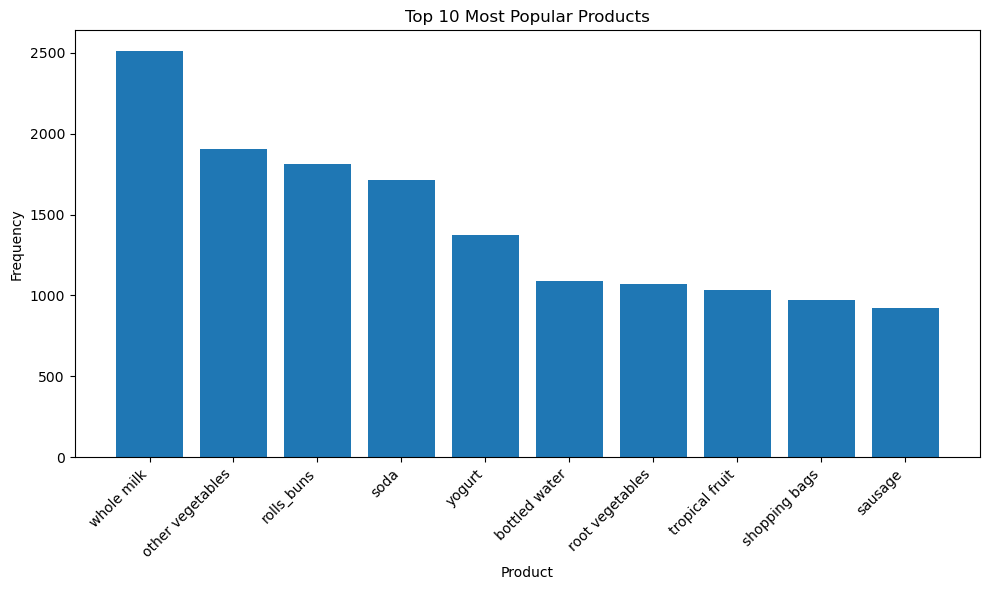

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(product_freq.head(10)['Product'], product_freq.head(10)['Frequency'])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Top 10 Most Popular Products')
plt.tight_layout()
plt.show()

In [29]:
transactions = transactions.applymap(lambda x: x.replace(" ", "_") if isinstance(x, str) else x)

In [30]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,0,1,2,3,4,5,6,7,8,9,_,d,o,p,r
0,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,False,False,False,False,False,True,True,True,True,True
3,False,False,False,True,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Zad7
### Ustawić parametr *min-sup* i  gerować 10 produktów najpopularniejszych i 10 produktów najrzadszych.

In [36]:
min_support = 0.003
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

top_10 = frequent_itemsets.head(10)
bottom_10 = frequent_itemsets.tail(10)

print(top_10)
print("\n\n")
print(bottom_10)

     support      itemsets
0   0.003254           (_)
16  0.003254     (_, d, p)
29  0.003254  (o, d, p, r)
28  0.003254  (_, o, p, r)
27  0.003254  (_, d, p, r)
26  0.003254  (_, d, o, r)
25  0.003254  (_, d, o, p)
24  0.003254     (o, p, r)
23  0.003254     (d, p, r)
22  0.003254     (o, d, r)



     support         itemsets
10  0.003254           (d, p)
9   0.003254           (o, d)
8   0.003254           (_, r)
7   0.003254           (_, p)
6   0.003254           (_, o)
5   0.003254           (_, d)
4   0.003254              (r)
3   0.003254              (p)
2   0.003254              (o)
30  0.003254  (d, o, _, p, r)


### Wizualizacja produktów częstych

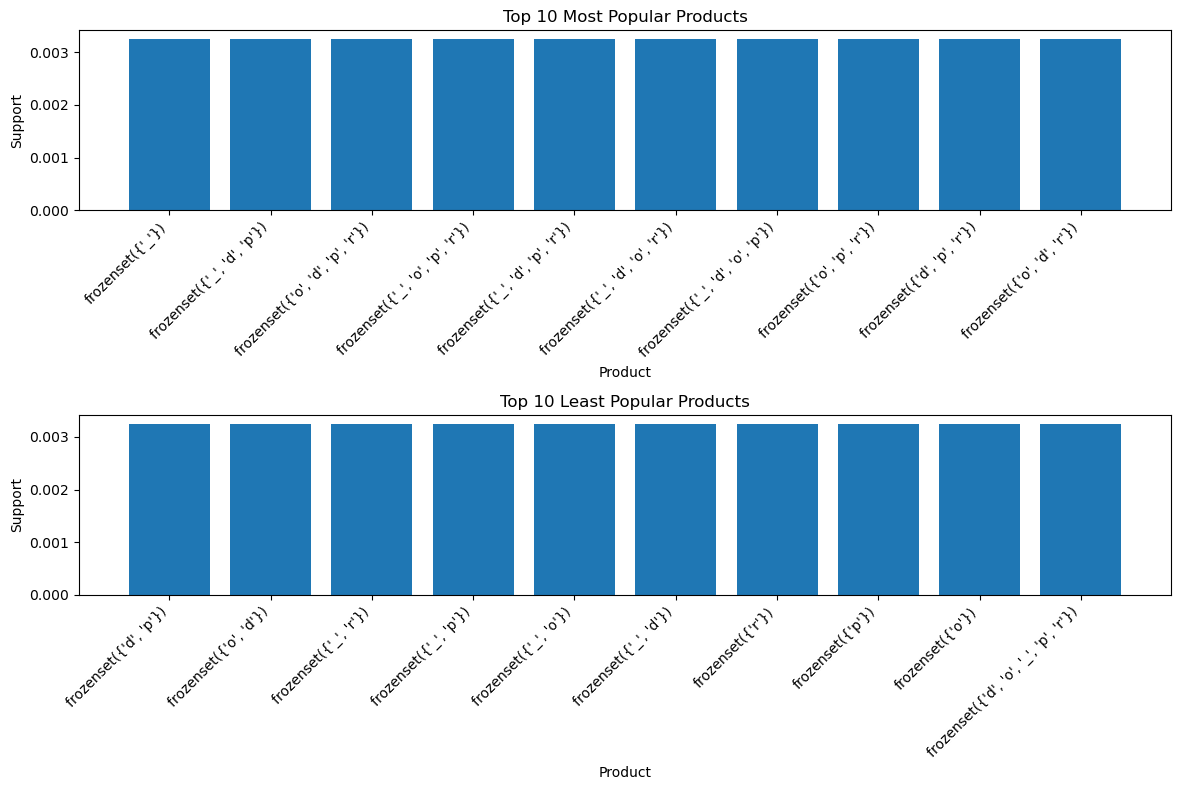

In [37]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(top_10['itemsets'].astype(str), top_10['support'])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Product')
plt.ylabel('Support')
plt.title('Top 10 Most Popular Products')

plt.subplot(2, 1, 2)
plt.bar(bottom_10['itemsets'].astype(str), bottom_10['support'])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Product')
plt.ylabel('Support')
plt.title('Top 10 Least Popular Products')

plt.tight_layout()
plt.show()